### Plot the SU energy - 1/D relation

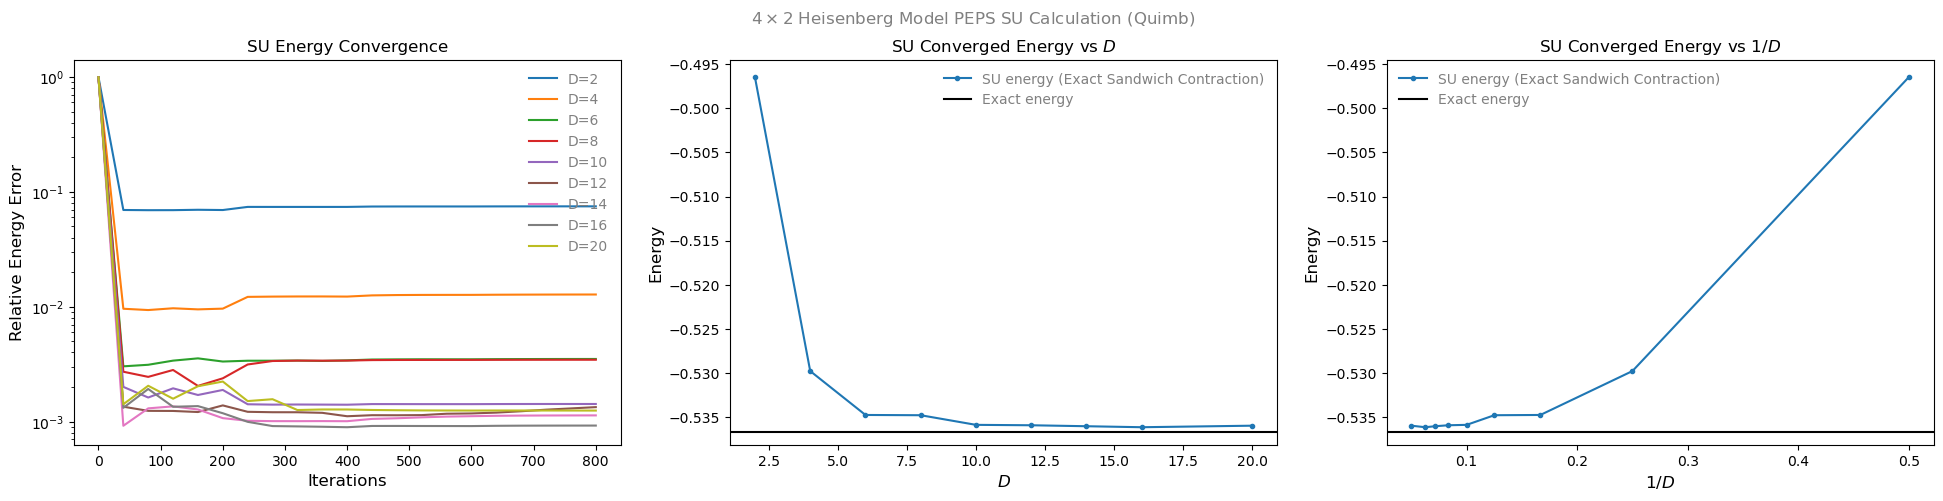

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import quimb as qu

Lx = 4
Ly = 2
D_list = [2, 4, 6, 8, 10, 12, 14, 16, 20]
D_inverse_list = [1 / D for D in D_list]

energy_exact = qu.groundenergy(qu.ham_heis_2D(Lx, Ly, sparse=True)) / (Lx * Ly)

energy_list = np.load('./SU_Heisenberg/4x2/energy_list.npy')
its_list = np.load('./SU_Heisenberg/4x2/its_list.npy')

fig, ax = plt.subplots(1, 3, figsize=(24, 5))
with plt.style.context(qu.NEUTRAL_STYLE):
    converged_energy_list = []
    for D in D_list:
        relative_error = np.abs(energy_list[D_list.index(D)] -
                                energy_exact) / np.abs(energy_exact)
        ax[0].plot(its_list[D_list.index(D)],
                   relative_error,
                   '-',
                   label='D=%d' % D)
        converged_energy = energy_list[D_list.index(D)][-1]
        converged_energy_list.append(converged_energy)

    ax[1].plot(D_list,
               converged_energy_list,
               '.-',
               label='SU energy (Exact Sandwich Contraction)')
    ax[1].set_xlabel(r"$D$", size=12)
    ax[1].set_ylabel('Energy', size=12)
    ax[1].set_title(r'SU Converged Energy vs $D$')
    ax[1].axhline(y=energy_exact,
                  color='k',
                  linestyle='-',
                  label='Exact energy')

    ax[0].set_xlabel('Iterations', size=12)
    ax[0].set_ylabel('Relative Energy Error', size=12)
    ax[0].set_title('SU Energy Convergence')
    ax[0].set_yscale('log')

    ax[2].plot(D_inverse_list,
               converged_energy_list,
               '.-',
               label=r'SU energy (Exact Sandwich Contraction)')
    ax[2].set_xlabel(r'$1/D$', size=12)
    ax[2].set_ylabel('Energy', size=12)
    ax[2].set_title(r'SU Converged Energy vs $1/D$')
    ax[2].axhline(y=energy_exact,
                  color='k',
                  linestyle='-',
                  label='Exact energy')
    # ax[2].set_xscale('log')

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

    plt.suptitle(r'$4\times2$ Heisenberg Model PEPS SU Calculation (Quimb)')
    plt.savefig('SU_Heisenberg/4x2/energy_convergence.png', dpi=300)

    plt.show()
